In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sps
import scipy.linalg as linalg

# Visualisation libraries

## Text
from IPython.display import display, Markdown, Latex


## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from matplotlib.font_manager import FontProperties

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 2.3 LDL decomposition


A closely related variant of the [Cholesky factorization](https://hatefdastour.github.io/notes/Numerical_Analysis/NLA_Cholesky_factorization.html) is the LDL decomposition. In this decomposition, a (real) symmetric positive definite matrix $A$ is decomposed as follows

$$ A =LDL^{*},$$

where $L$ is a lower triangular matrix, and $D$ is a diagonal matrix.


Furthermore, We have,

\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix}=
\begin{bmatrix}1 & 0 & \dots & 0 \\ l_{21} & 1 & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ l_{n1} & l_{n2} & \dots & 1 \end{bmatrix}
\begin{bmatrix}d_{11} & 0 & \dots & 0 \\ 0 & d_{22} & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ 0 & 0 & \dots & d_{nn} \end{bmatrix}.
\end{align*}
Solving this system, $l_{ij}$ and $d_{ii}$ can be identified as follows

\begin{align*}
d_{ii} &= a_{ii} - \sum_{k=1}^{i-1} l_{ij}^{2}d_{jj},\\
l_{ii} &= \frac{1}{d_{ii}}\left( a_{ij} - \sum_{k=1}^{i-1} l_{ik} l_{jk} d_{kk}\right),\\
\end{align*}
See [1] for the full derivation of this algorithm. Furthermore, we can prepare a Python code using the above algorithm.

In [2]:
def myLDL(A):
    '''
    Assuming that the matrix A is symmetric and positive definite,
    this function computes a unit lower triangular matrix L, and
    a diagonal matrix D, such that A = LDL^t
    Input: A the nxn matrix to be factorized
    n the number of rows and columns A has
    Output: L an nxn unit lower triangular matrix
    D an nxn diagonal matrix
    '''
    # create an nxn matrix U that holds L below its main diagonal
    # and D on its main diagonal
    n = A.shape[0]
    U = np.zeros([n,n], dtype = float)
    # define the first diagonal entry of D
    U[0, 0] = A[0, 0]
    # define the first column of L
    U[1:, 0] = A[1:, 0]/U[0, 0]
    for j in range(1, n):
        # define the jth diagonal entry of D
        U[j, j] = A[j, j]
        for k in range(0, j):
            U[j, j] = U[j, j] - U[k, k]*U[j, k]*U[j, k]
        # define the jth column of L
        for i in range(j+1, n):
            U[i, j] = A[i, j]
            for k in range(0, j):
                U[i, j] = U[i, j]- U[k, k]*U[i, k]*U[j, k]
            U[i, j] = U[i, j]/U[j, j]
    # Extract L and D from U
    L = np.tril(U,-1) + np.eye(n, dtype=float)
    D = np.diag(np.diag(U))
    return L, D

<font color='Blue'><b>Example</b></font>: Apply $LU$ decomposition on the following matrix.

$$A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$$

We have,

<IPython.core.display.Latex object>

array([[ 7,  3, -1,  2],
       [ 3,  8,  1, -4],
       [-1,  1,  4, -1],
       [ 2, -4, -1,  6]])

<IPython.core.display.Latex object>

array([[7.        , 0.        , 0.        , 0.        ],
       [0.        , 6.71428571, 0.        , 0.        ],
       [0.        , 0.        , 3.55319149, 0.        ],
       [0.        , 0.        , 0.        , 1.88622754]])

<IPython.core.display.Latex object>

array([[ 7.,  3., -1.,  2.],
       [ 3.,  8.,  1., -4.],
       [-1.,  1.,  4., -1.],
       [ 2., -4., -1.,  6.]])

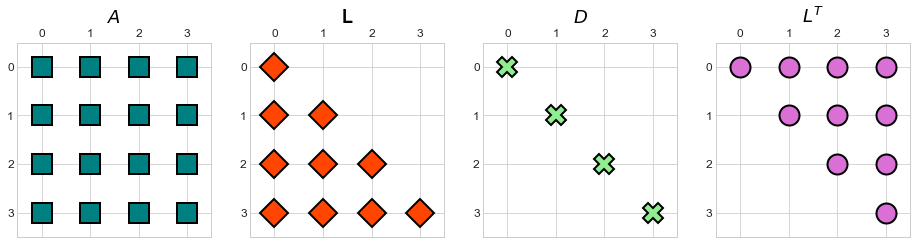

In [3]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
L, D = myLDL(A)
display(Latex(r'L ='))
display(A)
display(Latex(r'D ='))
display(D)
display(Latex(r'LD L^T ='))
display(np.matmul(L,np.matmul(D,L.T)))

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = ax[0].spy(sps.csr_matrix(A), aspect='equal', markersize= 20, color = 'Teal', markeredgecolor = 'Black',
              markeredgewidth = 2)
_ = ax[0].set_title(r'$A$', fontproperties=font, fontsize = 18)
_ = ax[1].spy(sps.csr_matrix(L), aspect='equal', markersize= 20, color = 'OrangeRed', markeredgecolor = 'Black',
              marker ='D', markeredgewidth = 2)
_ = ax[1].set_title('L', fontproperties=font, fontsize = 18)
_ = ax[2].spy(sps.csr_matrix(D), aspect='equal', markersize= 20, color = 'LightGreen', markeredgecolor = 'Black',
              marker ='X', markeredgewidth = 2)
_ = ax[2].set_title(r'$D$', fontproperties=font, fontsize = 18)
_ = ax[3].spy(sps.csr_matrix(L.T), aspect='equal', markersize= 20, color = 'Orchid', markeredgecolor = 'Black',
              marker ='o', markeredgewidth = 2)
_ = ax[3].set_title(r'$L^T$', fontproperties=font, fontsize = 18)

Note that we could get a similar results using function, [```scipy.linalg.ldl```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.ldl.html).

In [4]:
L, D, P = linalg.ldl(A)
display(Latex(r'L ='))
print(L)
display(Latex(r'D ='))
print(D)

<IPython.core.display.Latex object>

[[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [-0.14285714  0.21276596  1.          0.        ]
 [ 0.28571429 -0.72340426  0.08982036  1.        ]]


<IPython.core.display.Latex object>

[[7.         0.         0.         0.        ]
 [0.         6.71428571 0.         0.        ]
 [0.         0.         3.55319149 0.        ]
 [0.         0.         0.         1.88622754]]


### 2.3.1 Solving Linear systems using LDL decomposition

We can solve the linear system $Ax=b$ for $x$ using LDL decomposition. To demonstrate this, we use the following example,

Let
$$A=\left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]
\quad \text{and}\quad
b=\left[\begin{array}{c} 7\\ 1\\ 11\\ 15 \end{array}\right].$$
Then, this linear system can be also expressed as
$$Ax=(LDL^T)x=L(D(L^Tx))=b,$$ 	
we have,

In [5]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
b = np.array([[7],[1],[11],[15]])
L, D, P = linalg.ldl(A)
display(Latex(r'L ='))
print(L)
display(Latex(r'D ='))
print(D)

<IPython.core.display.Latex object>

[[ 1.          0.          0.          0.        ]
 [ 0.42857143  1.          0.          0.        ]
 [-0.14285714  0.21276596  1.          0.        ]
 [ 0.28571429 -0.72340426  0.08982036  1.        ]]


<IPython.core.display.Latex object>

[[7.         0.         0.         0.        ]
 [0.         6.71428571 0.         0.        ]
 [0.         0.         3.55319149 0.        ]
 [0.         0.         0.         1.88622754]]


Now we can solve the following linear systems instead
$$\begin{cases}
Lz = b,\\
Dy = z,\\
B^Tx=y.
\end{cases}$$

In [6]:
# solving Lz=b for z
z = np.linalg.solve(L, b)
display(Latex(r'z ='))
print(z)

<IPython.core.display.Latex object>

[[ 7.        ]
 [-2.        ]
 [12.42553191]
 [10.43712575]]


In [7]:
# solving Lz=b for z
y = np.linalg.solve(D, z)
display(Latex(r'y ='))
print(y)

<IPython.core.display.Latex object>

[[ 1.        ]
 [-0.29787234]
 [ 3.49700599]
 [ 5.53333333]]


In [8]:
# solving Ux=y for x
x = np.linalg.solve(L.T, y)
display(Latex(r'x ='))
print(x)

<IPython.core.display.Latex object>

[[-1.46666667]
 [ 3.06666667]
 [ 3.        ]
 [ 5.53333333]]


Let's now solve the linear system directly and compare the results.

In [9]:
x1 = np.linalg.solve(A, b)
display(Latex(r'x ='))
print(x1)

<IPython.core.display.Latex object>

[[-1.46666667]
 [ 3.06666667]
 [ 3.        ]
 [ 5.53333333]]


***
# References
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
***